In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import (confusion_matrix, accuracy_score)


6. This question should be answered using the Carseats data set.

In [3]:
car = pd.read_csv('Carseats.csv')
car['Urban'] = car['Urban'].map({'Yes': 1, 'No': 0})
car['US'] = car['US'].map({'Yes': 1, 'No': 0})
car.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,1,1
1,2,11.22,111,48,16,260,83,Good,65,10,1,1
2,3,10.06,113,35,10,269,80,Medium,59,12,1,1
3,4,7.40,117,100,4,466,97,Medium,55,14,1,1
4,5,4.15,141,64,3,340,128,Bad,38,13,1,0


(a) Fit a multiple regression model to predict Sales using Price, Urban, and US.

In [4]:
car_reg_fit = smf.ols('Sales ~ Price + Urban + US', data=car_seats_df).fit()
car_reg_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           2.39e-23
Time:                        08:02:02   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban         -0.0219      0.272     -0.081      0.936      -0.556       0.512
US             1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(b) Provide an interpretation of each coefficient in the model. Be careful - some of the variables in
the model are qualitative!

Answer: The predictors 'price' and 'US' ( whether item is located in the United states) play a vital role in determining the sales, but the are urban/non urban divide does not affect the sales as evidenced by the high p value. 

(c) Write out the model in equation form, being careful to handle the qualitative variables properly.

Answer: The equation for sales is : 

y = B + B0X0 + B1X1

sales = 13 + 1.2 * US - 0.05 * Price - 0.02 * Urban 
where US = 0 if not in US, 1 if in US; Urban = 1 if it is urban, else 0.

(d) For which of the predictors can you reject the null hypothesis H0 : βj= 0?


Answer: We can reject 𝐻0 for Price and location in [US]

(e) On the basis of your response to the previous question, fit a smaller model that only uses the
predictors for which there is evidence of association with the outcome


Answer: sales = 13 + 1.2 * US - 0.05 * Price

In [5]:
car_reg_fit_mod = smf.ols('Sales ~ Price + US', data=car_seats_df).fit()
car_reg_fit_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           2.66e-24
Time:                        08:15:19   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US             1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

f) How well do the models in (a) and (e) fit the data?

One indication to whether a term is a good fit is the R-sqaured term. The Adjusted R-squared increased slightly when we discarded "urban" thus indicating that it is better to eliminate that term . Both the models fit the data similarly. 

(g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s)

In [6]:
car_reg_fit_mod.conf_int(alpha=0.05)

,0,1
Intercept,11.79032,14.271265
Price,-0.06476,-0.044195
US,0.69152,1.707766


(h) Is there evidence of outliers or high leverage observations in the model from (e)?

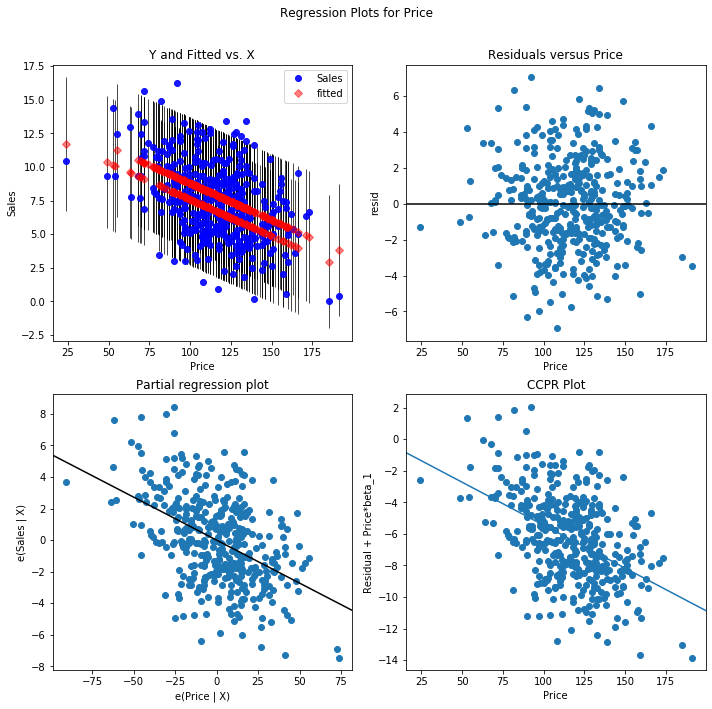

In [10]:
regress_plot = plt.figure(figsize=(10, 10))
regress_plot = sm.graphics.plot_regress_exog(car_reg_fit, 'Price', fig=regress_plot)

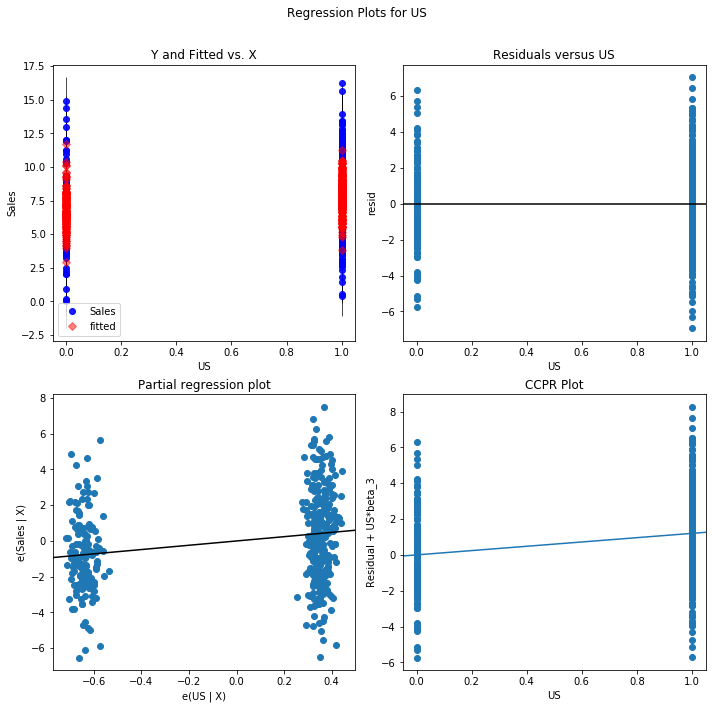

In [9]:
regress_plot = plt.figure(figsize=(10, 10))
regress_plot = sm.graphics.plot_regress_exog(car_reg_fit, 'US', fig=regress_plot)

(h) Is there evidence of outliers or high leverage observations in the model from (e)?

Yes, we can clearly see from the graphs that there are a few outliers and also some high leverage points.

7. This question focuses on the collinearity problem.

(a) Run the following lines in Python. The last line corresponds to creating a linear model in which y is a function of x1 and x2. Write out the form of the linear model. What are the regression coefficients? 

In [11]:
np.random.seed(0)
x1 = np.random.uniform(size=100)
x2 = 0.5 * x1 + np.random.normal(size=100)/10
y = 2 + 2 * x1 + 0.3 * x2 + np.random.normal(size=100)

Form of linear model is Y = 𝛽0+𝛽1∗𝑥1+𝛽2∗𝑥2+𝜖


𝛽0=2
𝛽1=2
𝛽2=0.3

b. What is the correlation between x1 and x2? Create a scatterplot displaying the relationship between the variables.

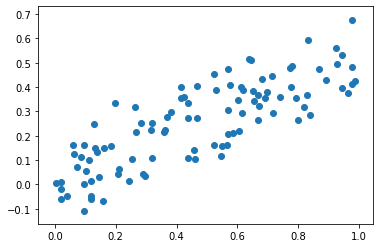

,x1,x2,y
x1,1.000000,0.819263,0.494035
x2,0.819263,1.000000,0.480170
y,0.494035,0.480170,1.000000


In [15]:
plt.scatter(x1,x2)
plt.show()
obj = {'x1': x1, 'x2': x2, 'y': y}
multi_df = pd.DataFrame(obj,columns=["x1", "x2", "y"])
multi_df.corr()

The variables are positively correlated with correlation of 0.867

(c) Using this data, fit a least squares regression to predict y using x1 and x2. Describe the results
obtained. What are ˆβ0, ˆβ1, and ˆβ2? How do these relate to the true β0, β1, and β2? Can you
reject the null hypothesis H0 : β1 = 0? How about the null hypothesis H0 : β2 = 0?

In [18]:
linear_fit = smf.ols('y ~ x1 + x2', data=multi_df).fit()
linear_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     17.16
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           4.16e-07
Time:                        08:24:51   Log-Likelihood:                -139.04
No. Observations:                 100   AIC:                             284.1
Df Residuals:                      97   BIC:                             291.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9217      0.191     10.071      0.000       1.543       2.300
x1             1.2007      0.597      2.011      0.047       0.016       2.385
x2             1.4931      0.991      1.507      0.135      -0.473       3.459
==============================================================================
Omnibus:                        0.196   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.907   Jarque-Bera (JB):                0.026
Skew:                           0.032   Prob(JB):                        0.987
Kurtosis:                       3.046   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

𝛽̂ 0 = 1.9217
𝛽̂ 1 = 1.2007
𝛽̂ 2 = 1.4931


The Values are close . 

We can reject the null hypothesis 𝐻0:𝛽̂ 1=0 as p value is less and 

accept 𝐻0:𝛽̂ 2=0 as p value is greater then 0.05 .

(d) Now fit a least squares regression to predict y using only x1. Comment on your results. Can you
reject the null hypothesis H0 : β1 = 0?

In [23]:
linear_fit_x1 = smf.ols('y ~ x1', data=multi_reg_df).fit()
linear_fit_x1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     31.64
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           1.76e-07
Time:                        08:29:42   Log-Likelihood:                -140.20
No. Observations:                 100   AIC:                             284.4
Df Residuals:                      98   BIC:                             289.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9548      0.191     10.247      0.000       1.576       2.333
x1             1.9378      0.344      5.625      0.000       1.254       2.621
==============================================================================
Omnibus:                        0.305   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.858   Jarque-Bera (JB):                0.050
Skew:                          -0.005   Prob(JB):                        0.975
Kurtosis:                       3.109   Cond. No.                         4.30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

𝛽̂ 0 = 1.9548
𝛽̂ 1 = 1.9378


The Values are close to original values of 2, 2 . 

We can reject the null hypothesis 𝐻0:𝛽̂ 1=0 as the p value is 0.

e) Now fit a least squares regression to predict y using only x2. Comment on your results. Can you
reject the null hypothesis H0 : β1 = 0?

In [24]:
linear_fit_x2 = smf.ols('y ~ x2', data=multi_reg_df).fit()
linear_fit_x2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     29.37
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           4.29e-07
Time:                        08:29:46   Log-Likelihood:                -141.09
No. Observations:                 100   AIC:                             286.2
Df Residuals:                      98   BIC:                             291.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0721      0.178     11.623      0.000       1.718       2.426
x2             3.1255      0.577      5.419      0.000       1.981       4.270
==============================================================================
Omnibus:                        0.213   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.899   Jarque-Bera (JB):                0.187
Skew:                           0.100   Prob(JB):                        0.911
Kurtosis:                       2.929   Cond. No.                         6.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

𝛽̂ 0 = 2.072
𝛽̂ 2 = 3.1255
The Value of 𝛽2 is not close to original value. We can reject the null hypothesis 𝐻0:𝛽̂ 2 =0 as the p value for this is less than .05



(f) Do the results obtained in (c)-(e) contradict each other? Explain your answer.

The 𝛽
values differ from c - e as we are attempting to contain the data for 2 vairables into 1 variable. All of the results obtained suggest rejecting the null hypothesis.

(g) Now suppose we obtain one additional observation, which was unfortunately mismeasured. Run
the following lines: Re-fit the linear models from (c)-(e) using this new data. What effect does this new observation
have on each of the models? In each model, is this observation an outlier? A high-leverage point?
Both? Explain your answers.

In [25]:
x1 = np.append(x1, 0.1)
x2 = np.append(x2, 0.8)
y = np.append(y, 6)

obj = {'x1': x1, 'x2': x2, 'y': y}
multi_df_1 = pd.DataFrame(obj,columns=["x1", "x2", "y"])

linear_fit = smf.ols('y ~ x1 + x2', data=multi_reg_df).fit()
linear_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     17.16
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           4.16e-07
Time:                        08:34:07   Log-Likelihood:                -139.04
No. Observations:                 100   AIC:                             284.1
Df Residuals:                      97   BIC:                             291.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9217      0.191     10.071      0.000       1.543       2.300
x1             1.2007      0.597      2.011      0.047       0.016       2.385
x2             1.4931      0.991      1.507      0.135      -0.473       3.459
==============================================================================
Omnibus:                        0.196   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.907   Jarque-Bera (JB):                0.026
Skew:                           0.032   Prob(JB):                        0.987
Kurtosis:                       3.046   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
linear_fit = smf.ols('y ~ x1', data=multi_reg_df).fit()
linear_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     31.64
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           1.76e-07
Time:                        08:34:33   Log-Likelihood:                -140.20
No. Observations:                 100   AIC:                             284.4
Df Residuals:                      98   BIC:                             289.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9548      0.191     10.247      0.000       1.576       2.333
x1             1.9378      0.344      5.625      0.000       1.254       2.621
==============================================================================
Omnibus:                        0.305   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.858   Jarque-Bera (JB):                0.050
Skew:                          -0.005   Prob(JB):                        0.975
Kurtosis:                       3.109   Cond. No.                         4.30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
linear_fit = smf.ols('y ~ x2', data=multi_reg_df).fit()
linear_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     29.37
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           4.29e-07
Time:                        08:35:11   Log-Likelihood:                -141.09
No. Observations:                 100   AIC:                             286.2
Df Residuals:                      98   BIC:                             291.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0721      0.178     11.623      0.000       1.718       2.426
x2             3.1255      0.577      5.419      0.000       1.981       4.270
==============================================================================
Omnibus:                        0.213   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.899   Jarque-Bera (JB):                0.187
Skew:                           0.100   Prob(JB):                        0.911
Kurtosis:                       2.929   Cond. No.                         6.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For the 1st regression with both predictors, it is a leverage point rather than an outlier. The predicted value with the given feature variables will give a wrong value. (2 instead of 6)